# Import the usual suspects

In [126]:
# Import pandas
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt

# Import Network X
import networkx as nx

# Run script to construct Disease/Drug graphs 

In [127]:
# Run
%run ./41_0_L_Create_DD_Graph.py

# Run statistics on graphs

In [128]:
# Read Disease
disease_g = nx.read_gpickle(DISEASE_GRAPH)

# Read Drug
drug_g = nx.read_gpickle(DRUGS_GRAPH)

In [129]:
# Disease eigenvector centrality
disease_eig = nx.eigenvector_centrality(disease_g, max_iter=500, weight='weight')

# Drug eigenvector centrality
drug_eig = nx.eigenvector_centrality(drug_g, max_iter=500, weight='weight')

In [130]:
# Disease PageRank 
disease_pgn = nx.pagerank(disease_g, alpha=0.9, weight='weight')

# Drug PageRank 
drug_pgn = nx.pagerank(drug_g, alpha=0.9, weight='weight')

In [131]:
# Disease Degree 
disease_deg = nx.degree_centrality(disease_g)

# Drug Degree 
drug_deg = nx.degree_centrality(drug_g)

# Get Top Diseases/Drugs for time-series analysis

In [132]:
# Get n-top nodes according to a specific metric
def get_top(dictionary, top):
    items = list(dictionary.items())
    items.sort(reverse=True, key=lambda x: x[1])
    return list(map(lambda x:x[0], items[:top]))

In [133]:
# Choose n-top
n_top = 20

# Creatre multi-index
outside = [*['Diseases']*3,*['Drugs']*3]
inside = ['EigenCentrality','PageRank','Degree']*2
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

# Create DataFrame with n-top diseases/drugs according to all the metrics
all_time_top = pd.DataFrame(data=[get_top(disease_eig, n_top),
                                  get_top(disease_pgn, n_top),
                                  get_top(disease_deg, n_top),
                                  get_top(drug_eig, n_top), 
                                  get_top(drug_pgn, n_top),
                                  get_top(drug_deg, n_top)], index=hier_index).transpose()

# Save as pickle file for Claire's time series analysis
all_time_top.to_pickle('All_Time_Top.pkl')

#Echo
all_time_top.head()

Diseases                             Drugs                  
  EigenCentrality PageRank   Degree EigenCentrality PageRank   Degree
0         D009369  D009369  D009369         D014157  D012333  D012333
1         D001943  D001943  D007249         D012333  D014157  D035683
2         D001932  D020022  D020022         D014408  D014408  D014157
3         D000230  D018450  D004195         D004268  D035683  D034741
4         D009362  D000230  D018450         D035683  D000970  D000970

# Get zoomed-in version for specific disease

/Users/luvela/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


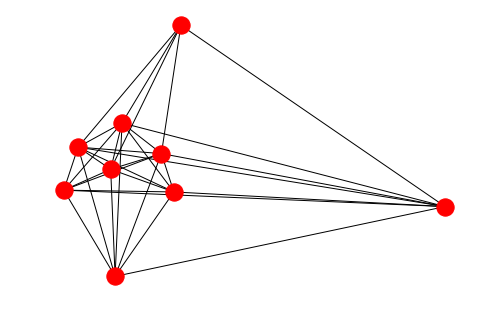

In [135]:
# Defined specific disease using MeSH-ID
specific_disease = 'D018455'

# Get all neighbors
neighs = list(disease_g.neighbors(specific_disease))

# Include n-most important nodes in the zoomed version (To give context)
n_most = 5
important_neighs = list(set(all_time_top['Diseases','EigenCentrality'].iloc[:n_most]) & 
                        set(all_time_top['Diseases','PageRank'].iloc[:n_most]) & 
                        set(all_time_top['Diseases','Degree'].iloc[:n_most]))

# Gather all relevant nodes
all_subnodes = list()
all_subnodes.append(specific_disease)
all_subnodes.extend(neighs)
all_subnodes.extend(important_neighs)

# Extract subgraph
disease_subg = nx.subgraph(disease_g, all_subnodes)

# Extract labels

# Draw
nx.draw(disease_subg)